In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ca = pd.read_csv('../../data/Initiated Building Permits (CA Tasks) 3yr.csv', 
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
fr = pd.read_csv('../../data/Initiated Building Permits (FR Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
pl = pd.read_csv('../../data/Initiated Building Permits (PL Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
pw = pd.read_csv('../../data/Initiated Building Permits (PW Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
sw = pd.read_csv('../../data/Initiated Building Permits (SW Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
ws = pd.read_csv('../../data/Initiated Building Permits (WS Tasks) 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued','Task_Complete_Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
u_o = pd.read_csv('../../data/Initiated Building Permits 3yr (Temp-Final U_O).csv',
                 parse_dates=['Date_Initiated','Date_Issued','Temp U&O Complete Date','Final U&O Complete Date'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category',
                        'RESULT_CODE': 'category'},
                         low_memory=False)
yr3 = pd.read_csv('../../data/Initiated Building Permits 3yr.csv',
                 parse_dates=['Date_Initiated','Date_Issued'],
                 dtype={'CASE_TYPE': 'category',
                        'SUB_TYPE': 'category',
                        'STATUS_CODE': 'category'},
                         low_memory=False)


In [3]:
u_o = u_o.dropna(subset = ['Final U&O Complete Date'])

In [4]:
ca = ca[~ca['PERMIT #'].astype(str).str.startswith('T', 'D')]
fr = fr[~fr['PERMIT #'].astype(str).str.startswith('T', 'D')]
pl = pl[~pl['PERMIT #'].astype(str).str.startswith('T', 'D')]
pw = pw[~pw['PERMIT #'].astype(str).str.startswith('T', 'D')]
sw = sw[~sw['PERMIT #'].astype(str).str.startswith('T', 'D')]
ws = ws[~ws['PERMIT #'].astype(str).str.startswith('T', 'D')]
u_o = u_o[~u_o['PERMIT #'].astype(str).str.startswith('T', 'D')]

In [5]:
ca['delta_task'] = ca['Task_Complete_Date'] - ca['Date_Initiated']
pl['delta_task'] = pl['Task_Complete_Date'] - pl['Date_Initiated']
fr['delta_task'] = fr['Task_Complete_Date'] - fr['Date_Initiated']
pw['delta_task'] = pw['Task_Complete_Date'] - pw['Date_Initiated']
sw['delta_task'] = sw['Task_Complete_Date'] - sw['Date_Initiated']
ws['delta_task'] = ws['Task_Complete_Date'] - ws['Date_Initiated']
u_o['delta_task'] = u_o['Final U&O Complete Date'] - u_o['Date_Initiated']

In [6]:
subset = ['Building Residential - New', 'Building Commercial - Rehab', 'Building Residential - Rehab', 'Building Commercial - Tenant Finish Out', 'Building Residential - Addition', 'Building Commercial - New']
colors = ["#573a6e"]
p = sns.set_palette(sns.color_palette(colors))

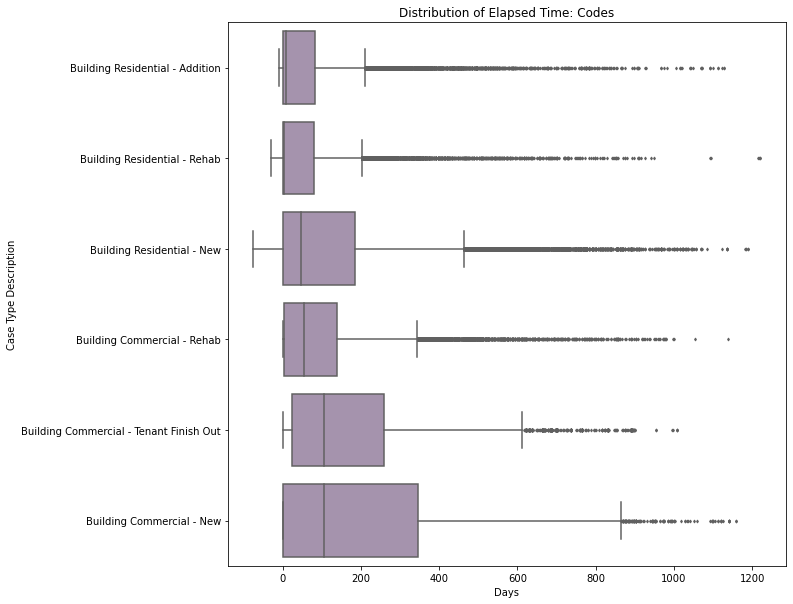

In [7]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=ca['delta_task'].dt.days, y=ca.loc[ca['CASE_TYPE_DESC'].isin(subset), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Codes')
ax.set(ylabel= 'Case Type Description', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/codes.png', bbox_inches = "tight", transparent = True, dpi=300)

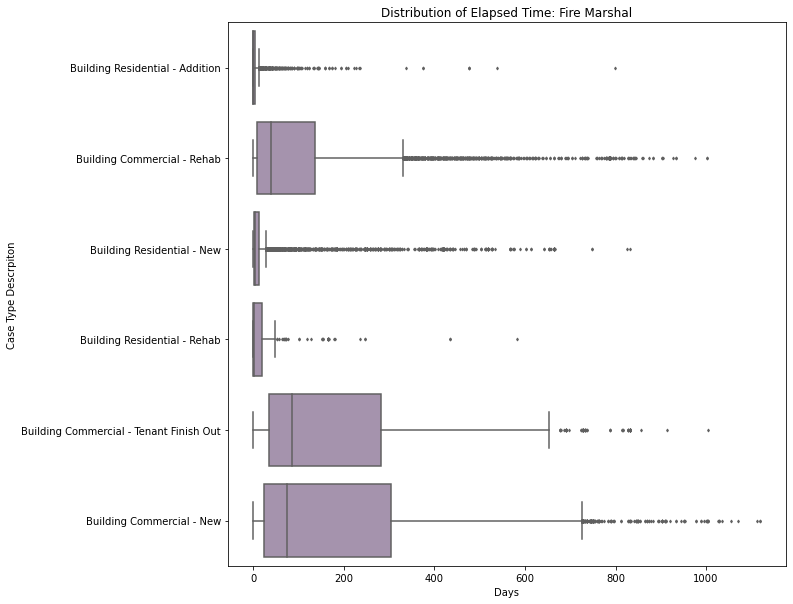

In [8]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=fr['delta_task'].dt.days, y=fr.loc[fr['CASE_TYPE_DESC'].isin(subset), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize = 2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Fire Marshal')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/fire.png', bbox_inches = "tight", transparent = True, dpi=300)

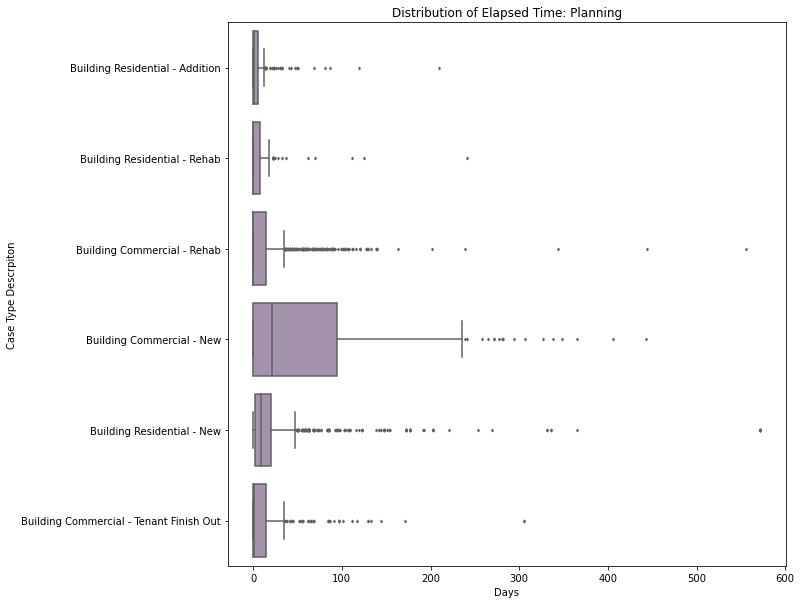

In [9]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=pl['delta_task'].dt.days, y=pl.loc[pl['CASE_TYPE_DESC'].isin(subset), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Planning')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/planning.png', bbox_inches = "tight", transparent = True, dpi = 300)

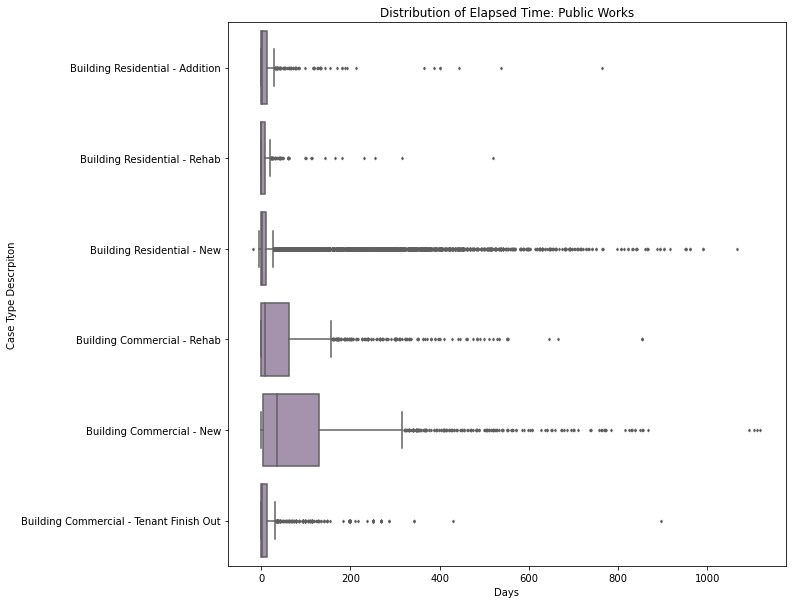

In [10]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=pw['delta_task'].dt.days, y=pw.loc[pw['CASE_TYPE_DESC'].isin(subset), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax, fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Public Works')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/publicworks.png', bbox_inches = "tight", transparent = True, dpi=300)

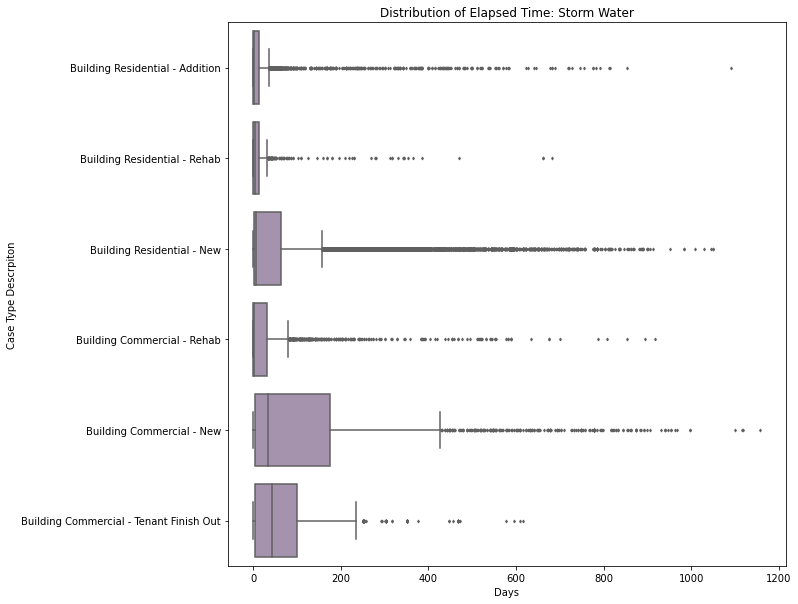

In [11]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=sw['delta_task'].dt.days, y=sw.loc[sw['CASE_TYPE_DESC'].isin(subset), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax,fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Time: Storm Water')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/stormwater.png', bbox_inches = "tight", transparent = True,dpi=300)

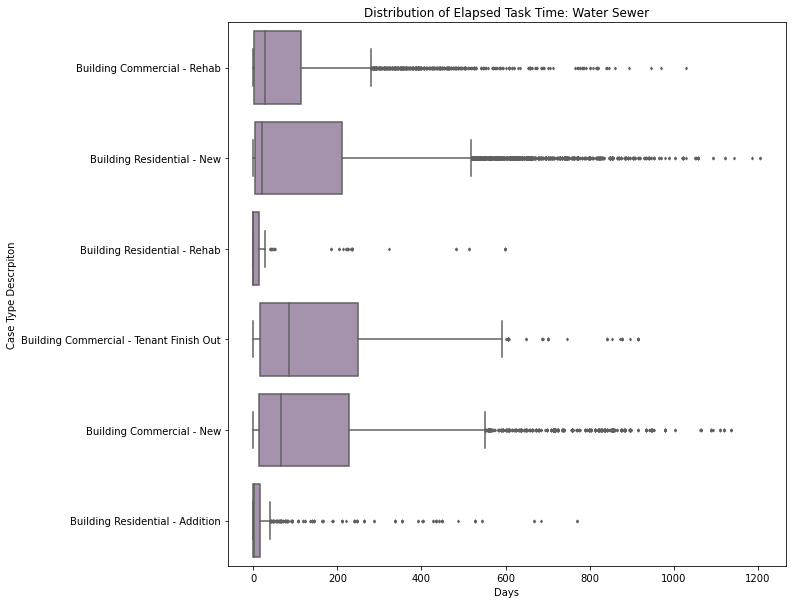

In [12]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=ws['delta_task'].dt.days, y=ws.loc[ws['CASE_TYPE_DESC'].isin(subset), 'CASE_TYPE_DESC'], color = "#a78fb1", ax=ax,fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Task Time: Water Sewer')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/watersewer.png', bbox_inches = "tight", transparent = True, dpi=300)

In [13]:
u_o.CASE_TYPE_DESC.value_counts()

Building Residential - New                  8811
Building Commercial - Rehab                 1624
Building Residential - Rehab                 963
Building Commercial - Tenant Finish Out      784
Building Residential - Addition              710
Building Commercial - New                    257
Building Commercial - Addition                65
Building Residential Rehab Storm Damage       61
Building Commercial - Shell                   59
Building Residential - Tenant Finish Out      44
Building Commercial Rehab Storm Damage        41
Building Residential New Storm Damage         31
Building Residential - Change Contractor      30
Building Residential - Fire Damage            29
Building Residential - Amend Permit           21
Building Commercial - Fire Damage             18
Building Commercial - Foundation              11
Building Commercial - Roofing / Siding         7
Building Residential - Roofing / Siding        4
Building Commercial - Change Contractor        3
Building Commercial 

In [14]:
subset = ['Building Residential - New', 'Building Commercial - Rehab', 'Building Residential - Rehab', 'Building Commercial - Tenant Finish Out', 'Building Residential - Addition', 'Building Commercial - New']

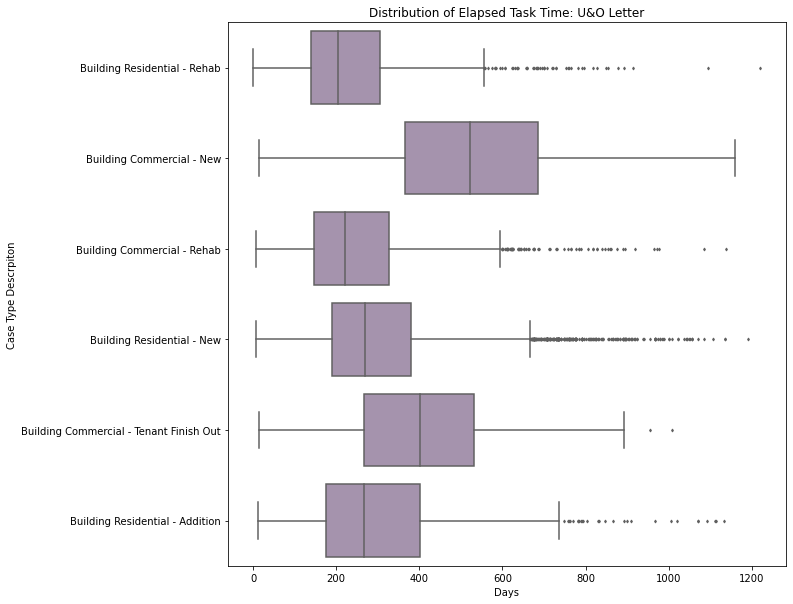

In [15]:
fig,ax=plt.subplots(figsize = (10,10))
sns.boxplot(x=u_o['delta_task'].dt.days, y=u_o.loc[u_o['CASE_TYPE_DESC'].isin(subset), 'CASE_TYPE_DESC'],color = "#a78fb1", ax=ax,fliersize=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Elapsed Task Time: U&O Letter')
ax.set(ylabel= 'Case Type Descrpiton', xlabel = 'Days')
plt.savefig('../../projects/metro_codes_building_permits-the-game-plan/UO.png', bbox_inches = "tight", transparent = True,dpi=300)